In [3]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")


In [4]:
data = pd.read_csv(r'C:\Users\pillo\Desktop\CarPrice_Assignment.csv')


In [5]:
data.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
125,126,3,porsche macan,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.110,9.5,143,5500,19,27,22018.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.900,9.5,207,5900,17,25,37028.0
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.680,9.0,111,5000,21,27,13495.0
12,13,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.190,9.0,121,4250,21,28,20970.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.640,21.5,123,4350,22,25,31600.0
99,100,0,nissan rogue,gas,std,four,hatchback,fwd,front,97.2,...,120,2bbl,3.33,3.470,8.5,97,5200,27,34,8949.0
32,33,1,honda civic,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.070,10.1,60,5500,38,42,5399.0
55,56,3,mazda 626,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.33,3.255,9.4,101,6000,17,23,10945.0
76,77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.230,9.4,68,5500,37,41,5389.0
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.640,21.5,123,4350,22,25,28248.0


In [6]:
# scale the label

data['price'] /= 1000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
categorico = list()
numerico = list()
for col in data.columns:
    if data[col].dtype == "O":
        categorico.append(col)
    else:
        numerico.append(col)


In [9]:
len(categorico)


10

In [10]:
for checar_categoria in categorico:
    print(checar_categoria, ":", data[checar_categoria].nunique(
    ), ":", data[checar_categoria].unique())


CarName : 147 : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'b

In [11]:
data.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13.276711
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7.988852
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5.118000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7.788000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10.295000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16.503000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45.400000


In [12]:
feature = "enginesize,curbweight,compressionratio,peakrpm,horsepower,stroke".split(
    ',')


In [13]:
X = data[feature]
Y = data.price


In [14]:
len(X.iloc[:,0].values)

205

In [15]:
X.iloc[:,0].values   #engine size

array([130, 130, 152, 109, 136, 136, 136, 136, 131, 131, 108, 108, 164,
       164, 164, 209, 209, 209,  61,  90,  90,  90,  90,  98,  90,  90,
        90,  98, 122, 156,  92,  92,  79,  92,  92,  92,  92, 110, 110,
       110, 110, 110, 110, 111,  90,  90, 119, 258, 258, 326,  91,  91,
        91,  91,  91,  70,  70,  70,  80, 122, 122, 122, 122, 122, 122,
       140, 134, 183, 183, 183, 183, 234, 234, 308, 304, 140,  92,  92,
        92,  98, 110, 122, 156, 156, 156, 122, 122, 110, 110,  97, 103,
        97,  97,  97,  97,  97,  97,  97,  97, 120, 120, 181, 181, 181,
       181, 181, 181, 120, 152, 120, 152, 120, 152, 120, 152, 120, 152,
       134,  90,  98,  90,  90,  98, 122, 156, 151, 194, 194, 194, 203,
       132, 132, 121, 121, 121, 121, 121, 121,  97, 108, 108, 108, 108,
       108, 108, 108, 108, 108, 108, 108,  92,  92,  92,  92,  92,  92,
        98,  98, 110, 110,  98,  98,  98,  98,  98,  98,  98, 146, 146,
       146, 146, 146, 146, 122, 110, 122, 122, 122, 171, 171, 17

In [16]:
len(Y)

205

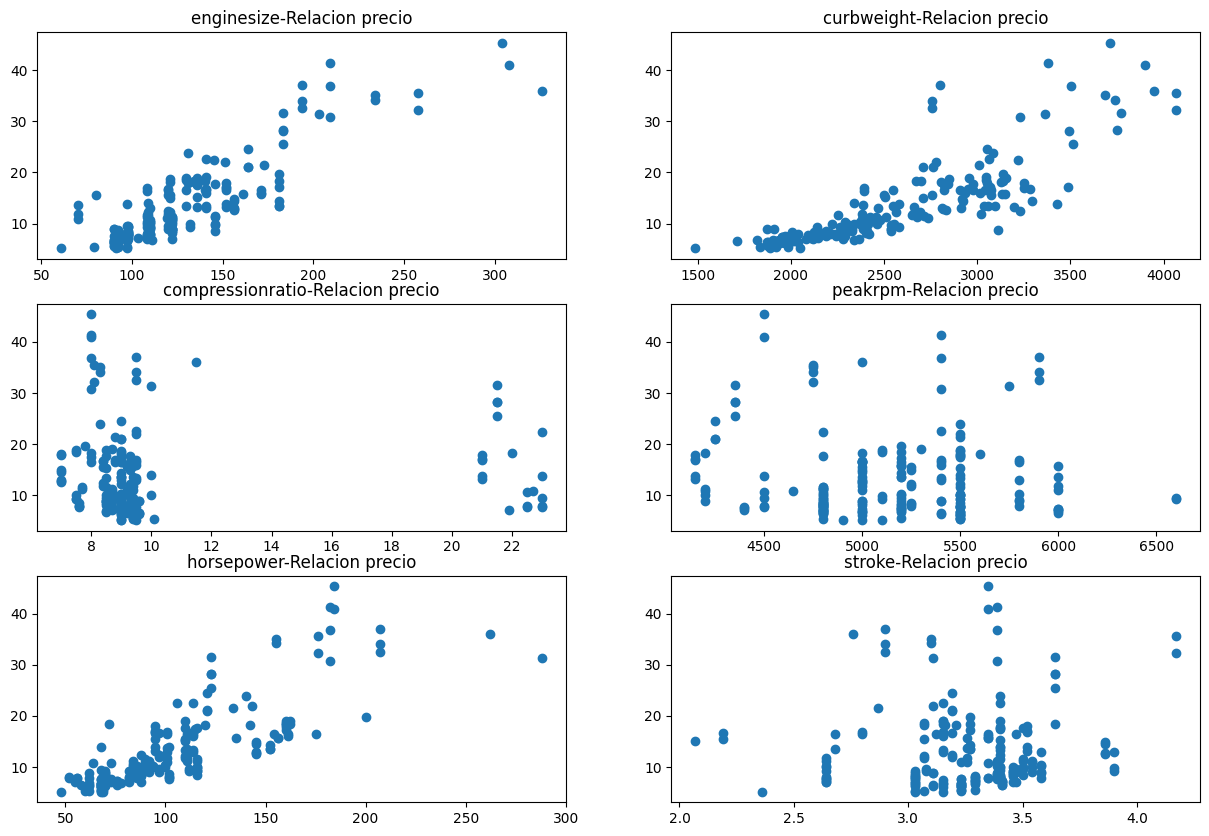

In [17]:
plt.figure(figsize=(15, 10))

for i, columna in enumerate(feature, 1):
    plt.subplot(3, 2, i)
    plt.scatter(X.iloc[:, i-1].values, Y)
    plt.title(f"{columna}-Relacion precio")


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
normalizador = keras.layers.Normalization()
normalizador.adapt(X_train)


In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=1))
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=0.001),
    loss="mean_absolute_error",
    metrics=[keras.metrics.RootMeanSquaredError()]
)


In [21]:
lote = 15
epochs = 120
historal = model.fit(x=X_train,y=y_train,batch_size=lote,epochs=epochs)

Epoch 1/120
11/11 [==============================] - 0s 1ms/step - loss: 3301.5068 - root_mean_squared_error: 3313.6274
Epoch 2/120
11/11 [==============================] - 0s 858us/step - loss: 3188.4890 - root_mean_squared_error: 3199.7839
Epoch 3/120
11/11 [==============================] - 0s 870us/step - loss: 3095.7114 - root_mean_squared_error: 3106.4902
Epoch 4/120
11/11 [==============================] - 0s 1ms/step - loss: 3006.7634 - root_mean_squared_error: 3017.4377
Epoch 5/120
11/11 [==============================] - 0s 870us/step - loss: 2919.0791 - root_mean_squared_error: 2929.6233
Epoch 6/120
11/11 [==============================] - 0s 833us/step - loss: 2831.5432 - root_mean_squared_error: 2841.6201
Epoch 7/120
11/11 [==============================] - 0s 863us/step - loss: 2743.9700 - root_mean_squared_error: 2753.4871
Epoch 8/120
11/11 [==============================] - 0s 1ms/step - loss: 2656.6211 - root_mean_squared_error: 2666.0942
Epoch 9/120
11/11 [===========

In [22]:
epochs_entrenado = historal.epoch
df = pd.DataFrame(historal.history)
rmse = df["root_mean_squared_error"]


In [23]:
df.sample(10)

,loss,root_mean_squared_error
7,2656.621094,2666.094238
15,1957.907227,1965.254761
90,14.486533,21.262388
10,2394.616699,2403.273193
80,15.376493,22.414352
42,21.118118,29.161720
24,1171.885132,1176.964111
25,1084.636475,1089.355103
52,18.280708,25.699232
9,2481.938965,2490.870605


In [24]:
df.tail()

,loss,root_mean_squared_error
115,13.322393,18.802080
116,12.873529,18.828815
117,13.126215,18.899147
118,13.068726,18.959431
119,12.942642,19.095299


Text(0, 0.5, 'Error cuadratico medio de la raiz')

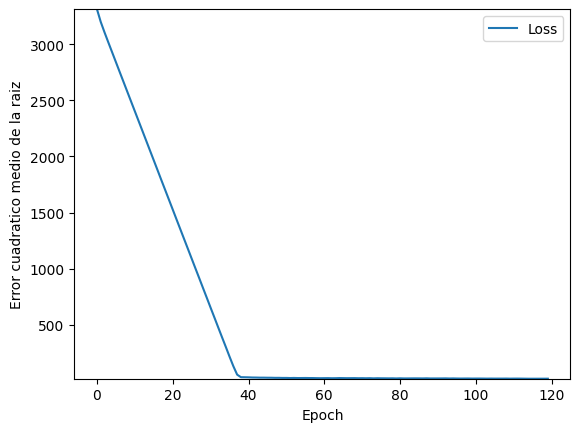

In [25]:
plt.plot(epochs_entrenado, rmse, label="Loss")
plt.legend()
plt.ylim([rmse.min(), rmse.max()])
plt.xlabel("Epoch")
plt.ylabel("Error cuadratico medio de la raiz")


In [26]:
model.get_weights()


[array([[ 9.3914735e-01],
        [-4.4759303e-02],
        [-7.5332955e-02],
        [ 5.5902789e-04],
        [-5.1723722e-02],
        [ 7.0995802e-01]], dtype=float32),
 array([0.41627908], dtype=float32)]

In [27]:
peso_entrenado = model.get_weights()[0]
bias_entrenado = model.get_weights()[1]


In [28]:
peso_entrenado

array([[ 9.3914735e-01],
       [-4.4759303e-02],
       [-7.5332955e-02],
       [ 5.5902789e-04],
       [-5.1723722e-02],
       [ 7.0995802e-01]], dtype=float32)

In [29]:
bias_entrenado


array([0.41627908], dtype=float32)

In [30]:
prediccion = model.predict(X_test)

2/2 [==============================] - 0s 1000us/step


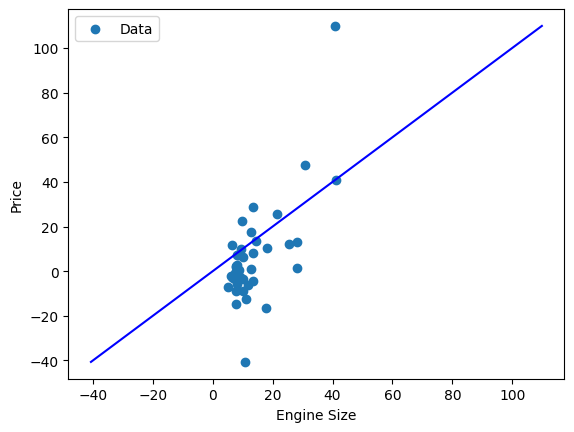

In [31]:
plt.scatter(y_test, prediccion, label='Data')
p1 = max(max(prediccion), max(y_test))
p2 = min(min(prediccion), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
